# All the information is on the task(master fan wiki)

In this notebook we try to use Python's BeautifulSoup module to scrape the wording of all the tasks from the popular TV show Taskmaster from the fan wiki:

https://taskmaster.fandom.com/wiki/Taskmaster_Wiki

with a view to analysing the wording of the tasks.

In [53]:
# Ususal uploads

from bs4 import BeautifulSoup
import requests
import numpy as np

from wordcloud import WordCloud
from pprint import pprint
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Series 16

As a first step in this direction we try to scrape the tasks for what is (at the time of scraping) the most recent full series to be broadcast in the UK, namely series 16.

In [2]:
url =  'https://taskmaster.fandom.com/wiki/Series_16'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs sse-other" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Series 16 | Taskmaster Wiki | Fandom</title>
<script>document.documentElement.className="client-js sse-other";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a8fa3fbd5b63309b893ba88896284b83","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Series_16","wgTitle":"Series 16","wgCurRevisionId":16937,"wgRevisionId":16937,"wgArticleId":3529,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Series","Series 16"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Series_16","

In [6]:
soup.title.string

'Series 16 | Taskmaster Wiki | Fandom'

In [7]:
soup.a

<a class="fandom-sticky-header__sitename" href="//taskmaster.fandom.com">Taskmaster Wiki</a>

In [8]:
all_starts = list(soup.find_all("tr", class_='tmtablerow'))
len(all_starts)

58

In [9]:
list(all_starts[3])

['\n',
 <td><b>Team:</b> Cross the finish line with all connections still connected.
 </td>]

## All the tasks in a single list

In [10]:
all_tasks = []
for i in range(len(all_starts)):
    if len(list(all_starts[i])) > 2:
        all_tasks.append(str(list(all_starts[i])[3]))
    else:
        all_tasks.append(str(list(all_starts[i])[1]))
            
            
pprint(all_tasks)

["<td><b>Prize:</b> Most wonderful wooden thing that they've owned for a "
 'while.\n'
 '</td>',
 '<td>Build a tower out of the cans in the lab. You must put on your blindfold '
 'in this room and wear it properly for the rest of the task.\n'
 '</td>',
 '<td><b>Team:</b> Connect the most individual parts of one person to '
 'individual parts of another person. All members of your team must be '
 'connected.\n'
 '</td>',
 '<td><b>Team:</b> Cross the finish line with all connections still '
 'connected.\n'
 '</td>',
 '<td>Get the duck into the lake. You must not touch the beak. If the duck '
 'leaves the course, it must re-enter at the point it left the course. If your '
 'duck touches the boundary or a flamingo or a pineapple, one minute will be '
 'added to your time.\n'
 '</td>',
 '<td><b>Live:</b> Say whether you think the next item is heavier or lighter '
 'than the previous item. If you are wrong, you are eliminated.\n'
 '</td>',
 '<td><b>Prize:</b> Best sign.\n</td>',
 '<td>Pull t

In [11]:
# Removing the stuff from the end

all_tasks = [task[:-7] for task in all_tasks]

In [12]:
all_tasks

["<td><b>Prize:</b> Most wonderful wooden thing that they've owned for a while",
 '<td>Build a tower out of the cans in the lab. You must put on your blindfold in this room and wear it properly for the rest of the task',
 '<td><b>Team:</b> Connect the most individual parts of one person to individual parts of another person. All members of your team must be connected',
 '<td><b>Team:</b> Cross the finish line with all connections still connected',
 '<td>Get the duck into the lake. You must not touch the beak. If the duck leaves the course, it must re-enter at the point it left the course. If your duck touches the boundary or a flamingo or a pineapple, one minute will be added to your time',
 '<td><b>Live:</b> Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 '<td><b>Prize:</b> Best sign',
 '<td>Pull the sword from the stone. You may not force the sword or break the stone',
 '<td>Make a cheeky picture on this piece 

## Extracting the Prize Tasks

In [13]:
prize_tasks = []

for i in range(len(all_tasks)):
    if 'Prize' in all_tasks[i]:
        prize_tasks.append(all_tasks[i])
        
prize_tasks

["<td><b>Prize:</b> Most wonderful wooden thing that they've owned for a while",
 '<td><b>Prize:</b> Best sign',
 "<td><b>Prize:</b> The present you've been given that raises the most questions",
 '<td><b>Prize:</b> Best thing for a grown-up that is meant for a child',
 '<td><b>Prize:</b> Best thing that has five things on it',
 '<td><b>Prize:</b> The greatest thing that makes quite a loud noise when you shake it',
 '<td><b>Prize:</b> The thing that is most guaranteed to make you groan',
 '<td><b>Prize:</b> The best single-word object you own and love that gets the best reaction when introduced following a drum roll',
 '<td><b>Prize:</b> The bit of old crap that Greg likes the best',
 '<td><b>Prize:</b> The thing that, when you turn it round, gives you the biggest shock']

In [14]:
prize_tasks = [task[18:] for task in prize_tasks]
prize_tasks

["Most wonderful wooden thing that they've owned for a while",
 'Best sign',
 "The present you've been given that raises the most questions",
 'Best thing for a grown-up that is meant for a child',
 'Best thing that has five things on it',
 'The greatest thing that makes quite a loud noise when you shake it',
 'The thing that is most guaranteed to make you groan',
 'The best single-word object you own and love that gets the best reaction when introduced following a drum roll',
 'The bit of old crap that Greg likes the best',
 'The thing that, when you turn it round, gives you the biggest shock']

In [15]:
prize_task_lengths = [len(task.split()) for task in prize_tasks]

In [16]:
prize_task_lengths

[10, 2, 10, 11, 8, 13, 10, 19, 10, 13]

In [17]:
np.array(prize_task_lengths).mean()

10.6

In [18]:
np.array(prize_task_lengths).var()

16.439999999999998

## Live tasks

In [19]:
live_tasks = []

for i in range(len(all_tasks)):
    if 'Live:' in all_tasks[i]:
        live_tasks.append(all_tasks[i])
        
live_tasks

['<td><b>Live:</b> Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 "<td><b>Live:</b> Write down one thing you like and one thing you don't like",
 '<td><b>Live:</b> Draw your two things at the same time. You must be drawing with both hands and stare at the Taskmaster throughout',
 '<td><b>Team Live:</b> One member of your team must lie on three of the squares and go to sleep. After they have taken their position, they must not move until the task is over. Taking it in turns, the other team members must try to land their cushion in each of the three sleep squares',
 '<td><b>Live:</b> Write the name of a different animal on each face of your dice. The most boring animal rolled will be eliminated',
 '<td><b>Live:</b> Sip your drink. You may only touch the loo roll and you may not reach over the line',
 '<td><b>Live:</b> Pass the pineapples amongst you for 15 seconds while the Taskmaster shuts his eyes and has a litt

In [20]:
live_tasks[3][22:]

'One member of your team must lie on three of the squares and go to sleep. After they have taken their position, they must not move until the task is over. Taking it in turns, the other team members must try to land their cushion in each of the three sleep squares'

In [21]:
for i in range(len(live_tasks)):
    if 'Team Live:' in live_tasks[i]:
        live_tasks[i] = live_tasks[i][22:]
        
live_tasks

['<td><b>Live:</b> Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 "<td><b>Live:</b> Write down one thing you like and one thing you don't like",
 '<td><b>Live:</b> Draw your two things at the same time. You must be drawing with both hands and stare at the Taskmaster throughout',
 'One member of your team must lie on three of the squares and go to sleep. After they have taken their position, they must not move until the task is over. Taking it in turns, the other team members must try to land their cushion in each of the three sleep squares',
 '<td><b>Live:</b> Write the name of a different animal on each face of your dice. The most boring animal rolled will be eliminated',
 '<td><b>Live:</b> Sip your drink. You may only touch the loo roll and you may not reach over the line',
 '<td><b>Live:</b> Pass the pineapples amongst you for 15 seconds while the Taskmaster shuts his eyes and has a little think. When the Tas

In [22]:
live_tasks[0][17:]

'Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated'

In [23]:
for i in range(len(live_tasks)):
    if 'Live:' in live_tasks[i]:
        live_tasks[i] = live_tasks[i][17:]
    
live_tasks

['Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 "Write down one thing you like and one thing you don't like",
 'Draw your two things at the same time. You must be drawing with both hands and stare at the Taskmaster throughout',
 'One member of your team must lie on three of the squares and go to sleep. After they have taken their position, they must not move until the task is over. Taking it in turns, the other team members must try to land their cushion in each of the three sleep squares',
 'Write the name of a different animal on each face of your dice. The most boring animal rolled will be eliminated',
 'Sip your drink. You may only touch the loo roll and you may not reach over the line',
 'Pass the pineapples amongst you for 15 seconds while the Taskmaster shuts his eyes and has a little think. When the Taskmaster opens his eyes, he will say if he thinks you are holding a pineapple behind your back or not. 

In [24]:
len(live_tasks)

12

In [25]:
live_task_lengths = [len(task.split()) for task in live_tasks]

In [26]:
live_task_lengths

[22, 12, 21, 52, 21, 18, 51, 35, 12, 33, 16, 28]

In [27]:
np.array(live_task_lengths).mean()

26.75

In [28]:
np.array(live_task_lengths).var()

170.85416666666666

# Cleaning-up the full list

In [29]:
all_tasks

["<td><b>Prize:</b> Most wonderful wooden thing that they've owned for a while",
 '<td>Build a tower out of the cans in the lab. You must put on your blindfold in this room and wear it properly for the rest of the task',
 '<td><b>Team:</b> Connect the most individual parts of one person to individual parts of another person. All members of your team must be connected',
 '<td><b>Team:</b> Cross the finish line with all connections still connected',
 '<td>Get the duck into the lake. You must not touch the beak. If the duck leaves the course, it must re-enter at the point it left the course. If your duck touches the boundary or a flamingo or a pineapple, one minute will be added to your time',
 '<td><b>Live:</b> Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 '<td><b>Prize:</b> Best sign',
 '<td>Pull the sword from the stone. You may not force the sword or break the stone',
 '<td>Make a cheeky picture on this piece 

In [ ]:
all_tasks[0][4:]

In [30]:
# Getting rid of the <td>s from the beinnings 

all_tasks = [task[4:] for task in all_tasks]
all_tasks

["<b>Prize:</b> Most wonderful wooden thing that they've owned for a while",
 'Build a tower out of the cans in the lab. You must put on your blindfold in this room and wear it properly for the rest of the task',
 '<b>Team:</b> Connect the most individual parts of one person to individual parts of another person. All members of your team must be connected',
 '<b>Team:</b> Cross the finish line with all connections still connected',
 'Get the duck into the lake. You must not touch the beak. If the duck leaves the course, it must re-enter at the point it left the course. If your duck touches the boundary or a flamingo or a pineapple, one minute will be added to your time',
 '<b>Live:</b> Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 '<b>Prize:</b> Best sign',
 'Pull the sword from the stone. You may not force the sword or break the stone',
 'Make a cheeky picture on this piece of wood using nails and one continuo

In [31]:
for i in range(len(all_tasks)):
    if 'Prize:' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][14:]
    if 'Team Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][18:]
    if 'Team' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
    if 'Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
        
all_tasks

["Most wonderful wooden thing that they've owned for a while",
 'Build a tower out of the cans in the lab. You must put on your blindfold in this room and wear it properly for the rest of the task',
 'Connect the most individual parts of one person to individual parts of another person. All members of your team must be connected',
 'Cross the finish line with all connections still connected',
 'Get the duck into the lake. You must not touch the beak. If the duck leaves the course, it must re-enter at the point it left the course. If your duck touches the boundary or a flamingo or a pineapple, one minute will be added to your time',
 'Say whether you think the next item is heavier or lighter than the previous item. If you are wrong, you are eliminated',
 'Best sign',
 'Pull the sword from the stone. You may not force the sword or break the stone',
 'Make a cheeky picture on this piece of wood using nails and one continuous piece of wire. Also, if any egg timers stop, you must stare at t

In [32]:
all_tasks[55]

'Demonstrate the most effective high-intensity four-part exercise routine. Each of your four exercises must be original and must take place on this mat. The first must last eight seconds, the second four, the third two and the fourth one second long.<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup'

In [ ]:
# Wierd issue with task 55

for i in range(len(all_tasks)):
    if '<' in all_tasks[i]:
        print(i)
    

In [33]:
all_tasks[55] = all_tasks[55][:-75]

In [34]:
all_tasks[55]

'Demonstrate the most effective high-intensity four-part exercise routine. Each of your four exercises must be original and must take place on this mat. The first must last eight seconds, the second four, the third two and the fourth one second long'

In [35]:
for i in range(len(all_tasks)):
    if all_tasks[i] == '-':
        print(i)
    


In [36]:
all_tasks[32]

''

In [ ]:
len(all_tasks)

## NLP cleaning up

In [37]:
tasks_split = [task.split() for task in all_tasks]
tasks_split

[['Most',
  'wonderful',
  'wooden',
  'thing',
  'that',
  "they've",
  'owned',
  'for',
  'a',
  'while'],
 ['Build',
  'a',
  'tower',
  'out',
  'of',
  'the',
  'cans',
  'in',
  'the',
  'lab.',
  'You',
  'must',
  'put',
  'on',
  'your',
  'blindfold',
  'in',
  'this',
  'room',
  'and',
  'wear',
  'it',
  'properly',
  'for',
  'the',
  'rest',
  'of',
  'the',
  'task'],
 ['Connect',
  'the',
  'most',
  'individual',
  'parts',
  'of',
  'one',
  'person',
  'to',
  'individual',
  'parts',
  'of',
  'another',
  'person.',
  'All',
  'members',
  'of',
  'your',
  'team',
  'must',
  'be',
  'connected'],
 ['Cross',
  'the',
  'finish',
  'line',
  'with',
  'all',
  'connections',
  'still',
  'connected'],
 ['Get',
  'the',
  'duck',
  'into',
  'the',
  'lake.',
  'You',
  'must',
  'not',
  'touch',
  'the',
  'beak.',
  'If',
  'the',
  'duck',
  'leaves',
  'the',
  'course,',
  'it',
  'must',
  're-enter',
  'at',
  'the',
  'point',
  'it',
  'left',
  'the',
 

In [38]:
task_words = []
for task in tasks_split:
    task_words += task

task_words

['Most',
 'wonderful',
 'wooden',
 'thing',
 'that',
 "they've",
 'owned',
 'for',
 'a',
 'while',
 'Build',
 'a',
 'tower',
 'out',
 'of',
 'the',
 'cans',
 'in',
 'the',
 'lab.',
 'You',
 'must',
 'put',
 'on',
 'your',
 'blindfold',
 'in',
 'this',
 'room',
 'and',
 'wear',
 'it',
 'properly',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'task',
 'Connect',
 'the',
 'most',
 'individual',
 'parts',
 'of',
 'one',
 'person',
 'to',
 'individual',
 'parts',
 'of',
 'another',
 'person.',
 'All',
 'members',
 'of',
 'your',
 'team',
 'must',
 'be',
 'connected',
 'Cross',
 'the',
 'finish',
 'line',
 'with',
 'all',
 'connections',
 'still',
 'connected',
 'Get',
 'the',
 'duck',
 'into',
 'the',
 'lake.',
 'You',
 'must',
 'not',
 'touch',
 'the',
 'beak.',
 'If',
 'the',
 'duck',
 'leaves',
 'the',
 'course,',
 'it',
 'must',
 're-enter',
 'at',
 'the',
 'point',
 'it',
 'left',
 'the',
 'course.',
 'If',
 'your',
 'duck',
 'touches',
 'the',
 'boundary',
 'or',
 'a',
 'flamingo',
 'or',

In [39]:
tasks_lower = [task.lower() for task in task_words]
tasks_lower

['most',
 'wonderful',
 'wooden',
 'thing',
 'that',
 "they've",
 'owned',
 'for',
 'a',
 'while',
 'build',
 'a',
 'tower',
 'out',
 'of',
 'the',
 'cans',
 'in',
 'the',
 'lab.',
 'you',
 'must',
 'put',
 'on',
 'your',
 'blindfold',
 'in',
 'this',
 'room',
 'and',
 'wear',
 'it',
 'properly',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'task',
 'connect',
 'the',
 'most',
 'individual',
 'parts',
 'of',
 'one',
 'person',
 'to',
 'individual',
 'parts',
 'of',
 'another',
 'person.',
 'all',
 'members',
 'of',
 'your',
 'team',
 'must',
 'be',
 'connected',
 'cross',
 'the',
 'finish',
 'line',
 'with',
 'all',
 'connections',
 'still',
 'connected',
 'get',
 'the',
 'duck',
 'into',
 'the',
 'lake.',
 'you',
 'must',
 'not',
 'touch',
 'the',
 'beak.',
 'if',
 'the',
 'duck',
 'leaves',
 'the',
 'course,',
 'it',
 'must',
 're-enter',
 'at',
 'the',
 'point',
 'it',
 'left',
 'the',
 'course.',
 'if',
 'your',
 'duck',
 'touches',
 'the',
 'boundary',
 'or',
 'a',
 'flamingo',
 'or',

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
# removing pubtutation marks
    
tasks_no_punc = [word.replace(string.punctuation, '') for word in tasks_lower]
tasks_no_punc

['most',
 'wonderful',
 'wooden',
 'thing',
 'that',
 "they've",
 'owned',
 'for',
 'a',
 'while',
 'build',
 'a',
 'tower',
 'out',
 'of',
 'the',
 'cans',
 'in',
 'the',
 'lab.',
 'you',
 'must',
 'put',
 'on',
 'your',
 'blindfold',
 'in',
 'this',
 'room',
 'and',
 'wear',
 'it',
 'properly',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'task',
 'connect',
 'the',
 'most',
 'individual',
 'parts',
 'of',
 'one',
 'person',
 'to',
 'individual',
 'parts',
 'of',
 'another',
 'person.',
 'all',
 'members',
 'of',
 'your',
 'team',
 'must',
 'be',
 'connected',
 'cross',
 'the',
 'finish',
 'line',
 'with',
 'all',
 'connections',
 'still',
 'connected',
 'get',
 'the',
 'duck',
 'into',
 'the',
 'lake.',
 'you',
 'must',
 'not',
 'touch',
 'the',
 'beak.',
 'if',
 'the',
 'duck',
 'leaves',
 'the',
 'course,',
 'it',
 'must',
 're-enter',
 'at',
 'the',
 'point',
 'it',
 'left',
 'the',
 'course.',
 'if',
 'your',
 'duck',
 'touches',
 'the',
 'boundary',
 'or',
 'a',
 'flamingo',
 'or',

In [51]:
tasks_no_punc = []

for word in tasks_lower:
    tasks_no_punc.append(word.replace(string.punctuation, ''))
    
tasks_no_punc

['most',
 'wonderful',
 'wooden',
 'thing',
 'that',
 "they've",
 'owned',
 'for',
 'a',
 'while',
 'build',
 'a',
 'tower',
 'out',
 'of',
 'the',
 'cans',
 'in',
 'the',
 'lab.',
 'you',
 'must',
 'put',
 'on',
 'your',
 'blindfold',
 'in',
 'this',
 'room',
 'and',
 'wear',
 'it',
 'properly',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'task',
 'connect',
 'the',
 'most',
 'individual',
 'parts',
 'of',
 'one',
 'person',
 'to',
 'individual',
 'parts',
 'of',
 'another',
 'person.',
 'all',
 'members',
 'of',
 'your',
 'team',
 'must',
 'be',
 'connected',
 'cross',
 'the',
 'finish',
 'line',
 'with',
 'all',
 'connections',
 'still',
 'connected',
 'get',
 'the',
 'duck',
 'into',
 'the',
 'lake.',
 'you',
 'must',
 'not',
 'touch',
 'the',
 'beak.',
 'if',
 'the',
 'duck',
 'leaves',
 'the',
 'course,',
 'it',
 'must',
 're-enter',
 'at',
 'the',
 'point',
 'it',
 'left',
 'the',
 'course.',
 'if',
 'your',
 'duck',
 'touches',
 'the',
 'boundary',
 'or',
 'a',
 'flamingo',
 'or',

In [52]:
for i in range(len(tasks_no_punc)):
    if tasks_no_punc[i] == "they've":
        tasks_no_punc[i] = 'they'
        
tasks_no_punc

['most',
 'wonderful',
 'wooden',
 'thing',
 'that',
 'they',
 'owned',
 'for',
 'a',
 'while',
 'build',
 'a',
 'tower',
 'out',
 'of',
 'the',
 'cans',
 'in',
 'the',
 'lab.',
 'you',
 'must',
 'put',
 'on',
 'your',
 'blindfold',
 'in',
 'this',
 'room',
 'and',
 'wear',
 'it',
 'properly',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'task',
 'connect',
 'the',
 'most',
 'individual',
 'parts',
 'of',
 'one',
 'person',
 'to',
 'individual',
 'parts',
 'of',
 'another',
 'person.',
 'all',
 'members',
 'of',
 'your',
 'team',
 'must',
 'be',
 'connected',
 'cross',
 'the',
 'finish',
 'line',
 'with',
 'all',
 'connections',
 'still',
 'connected',
 'get',
 'the',
 'duck',
 'into',
 'the',
 'lake.',
 'you',
 'must',
 'not',
 'touch',
 'the',
 'beak.',
 'if',
 'the',
 'duck',
 'leaves',
 'the',
 'course,',
 'it',
 'must',
 're-enter',
 'at',
 'the',
 'point',
 'it',
 'left',
 'the',
 'course.',
 'if',
 'your',
 'duck',
 'touches',
 'the',
 'boundary',
 'or',
 'a',
 'flamingo',
 'or',
 '

In [54]:
stop_words = set(stopwords.words('english'))

In [57]:
tasks_no_stop = [word for word in tasks_no_punc if word not in stop_words]

In [58]:
len(tasks_no_punc)

1347

In [59]:
len(tasks_no_stop)

722

## Attempted word cloud

In [66]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [67]:
df = pd.DataFrame(tasks_no_stop)
df.head()

,0
0,wonderful
1,wooden
2,thing
3,owned
4,build


In [95]:
df[0].value_counts()

must        43
one         21
may         13
touch        9
thing        8
            ..
square,      1
every        1
squares.     1
art          1
bathtub,     1
Name: 0, Length: 441, dtype: int64

In [71]:
wordcloud = WordCloud().generate(tasks_no_stop)

TypeError: expected string or bytes-like object, got 'list'

In [79]:
text = ''
for words in tasks_no_stop:
    text += words + ' '


In [82]:
wordcloud = WordCloud(background_color="white").generate(text)

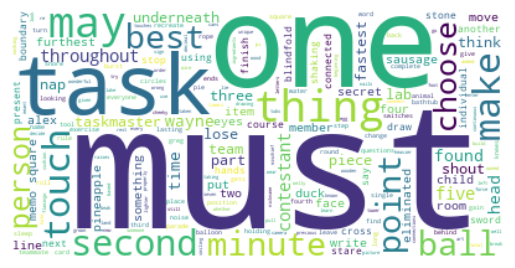

In [83]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()